## Merging news data with daily weather data

In [503]:
import pandas as pd  # Library for data manipulation and analysis

# Load the cleaned news data and the daily weather data 
news_df = pd.read_csv('News_data.csv')
weather_daily_df = pd.read_csv('weather_data_daily.csv')

In [504]:
# Displaying the "news_df" DataFrame to review its contents.
news_df

,Date,month,article count
0,2011-01-02,2011-01,1
1,2011-01-03,2011-01,2
2,2011-01-04,2011-01,2
3,2011-01-05,2011-01,2
4,2011-01-06,2011-01,2
...,...,...,...
3607,2023-08-10,2023-08,2
3608,2023-08-11,2023-08,5
3609,2023-08-12,2023-08,3
3610,2023-08-13,2023-08,2


In [505]:
weather_daily_df

,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8
...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4


In [506]:
# Merge the weather data (`weather_daily_df`) with the news data (`news_df`) using the 'date' column from `weather_daily_df` and 'Date' column from `news_df`
merged_daily_df = weather_daily_df.merge(news_df[['Date', 'article count']], left_on='date', right_on='Date', how='left')

# Drop the 'Date' column from `news_df` as it's redundant now
merged_daily_df.drop(columns='Date', inplace=True)

# Fill any NaN values in the 'article count' column with 0 and convert to integer
merged_daily_df['article count'] = merged_daily_df['article count'].fillna(0).astype(int)

# Save the merged dataframe to a CSV file
merged_daily_df.to_csv('Final_daily_data.csv', index=False)

# Display the merged DataFrame
merged_daily_df


,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation,article count
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7,0
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2,1
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0,2
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1,2
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8,2
...,...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6,2
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7,5
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6,3
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4,2


In [507]:
# Add the new column based on the condition
merged_daily_df['2019 struc dummy'] = (merged_daily_df['date'] > '2019-01-01').astype(int)

merged_daily_df

,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation,article count,2019 struc dummy
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7,0,0
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2,1,0
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0,2,0
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1,2,0
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8,2,0
...,...,...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6,2,1
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7,5,1
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6,3,1
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4,2,1


## Visualization

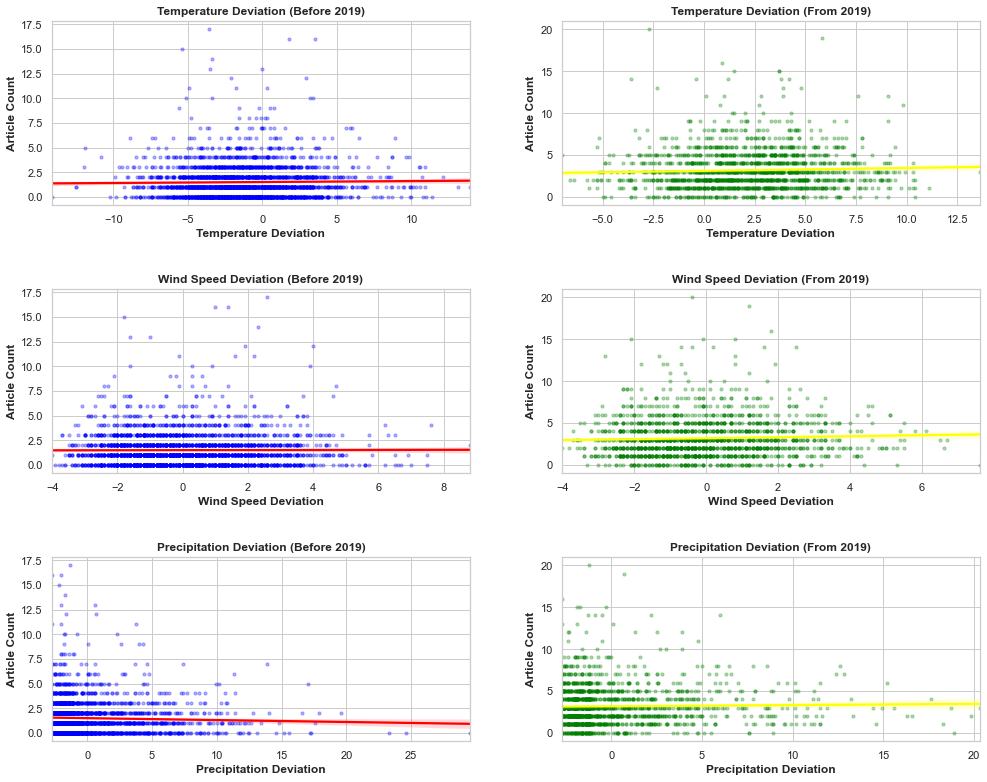

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data based on the 2019 structural break
before_2019 = merged_daily_df[merged_daily_df['date'] < '2019-01-01']
after_2019 = merged_daily_df[merged_daily_df['date'] >= '2019-01-01']

deviation_variables = ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']
labels = ['Temperature Deviation', 'Wind Speed Deviation', 'Precipitation Deviation']

# Set up the figure layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

for i, (var, label) in enumerate(zip(deviation_variables, labels)):
    
    # Scatter plot with line of best fit for data before 2019
    sns.regplot(x=before_2019[var], y=before_2019['article count'], ax=axes[i, 0], color='blue', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i, 0].set_title(f"{label} (Before 2019)", fontweight='bold')
    axes[i, 0].set_xlabel(label, fontweight='bold')
    axes[i, 0].set_ylabel('Article Count', fontweight='bold')
    
    # Scatter plot with line of best fit for data from 2019 onwards
    sns.regplot(x=after_2019[var], y=after_2019['article count'], ax=axes[i, 1], color='green', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'yellow'})
    axes[i, 1].set_title(f"{label} (From 2019)", fontweight='bold')
    axes[i, 1].set_xlabel(label, fontweight='bold')
    axes[i, 1].set_ylabel('Article Count', fontweight='bold')

plt.show()


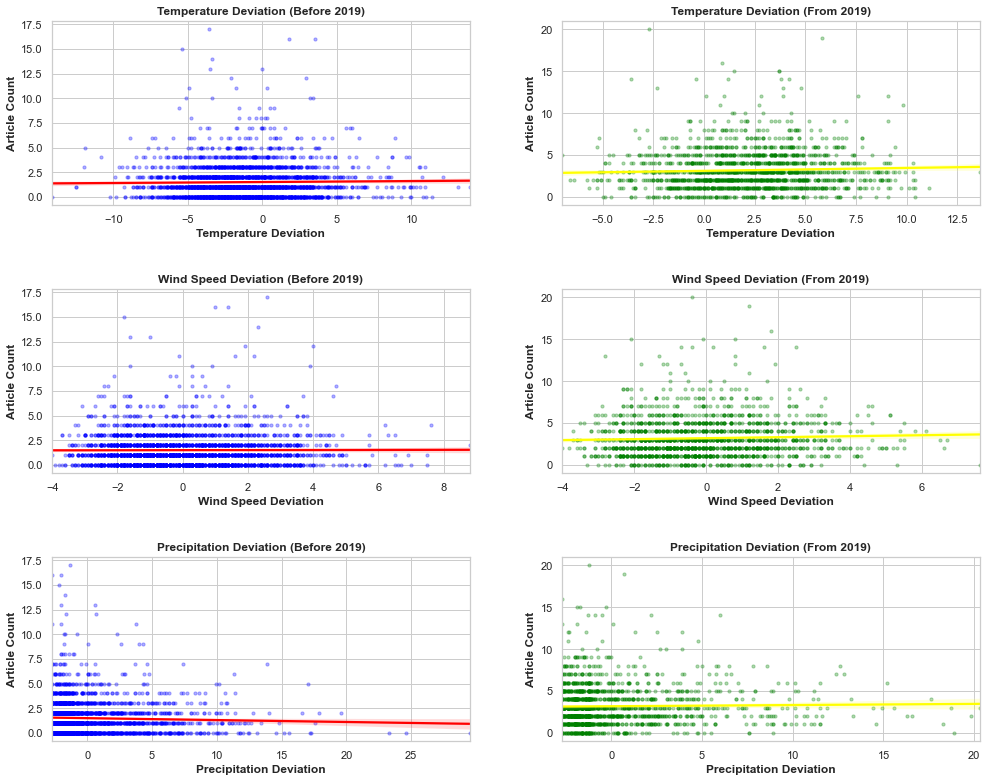

In [510]:
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data based on the 2019 structural break
before_2019 = merged_daily_df[merged_daily_df['date'] < '2019-01-01']
after_2019 = merged_daily_df[merged_daily_df['date'] >= '2019-01-01']

deviation_variables = [
    'mean_temp_deviation', 
    'mean_wind_speed_deviation', 
    'acc_precip_deviation'
]
labels = [
    'Temperature Deviation', 
    'Wind Speed Deviation', 
    'Precipitation Deviation'
]

# Set up the figure layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

for i, (var, label) in enumerate(zip(deviation_variables, labels)):
    
    # Scatter plot with line of best fit for data before 2019
    sns.regplot(x=before_2019[var], y=before_2019['article count'], ax=axes[i, 0], color='blue', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i, 0].set_title(f"{label} (Before 2019)", fontweight='bold')
    axes[i, 0].set_xlabel(label, fontweight='bold')
    axes[i, 0].set_ylabel('Article Count', fontweight='bold')
    
    # Scatter plot with line of best fit for data from 2019 onwards
    sns.regplot(x=after_2019[var], y=after_2019['article count'], ax=axes[i, 1], color='green', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'yellow'})
    axes[i, 1].set_title(f"{label} (From 2019)", fontweight='bold')
    axes[i, 1].set_xlabel(label, fontweight='bold')
    axes[i, 1].set_ylabel('Article Count', fontweight='bold')

plt.show()


## Analysis

## 1 week articles = deviation variables before/from 2019

In [511]:
# Necessary imports
import statsmodels.api as sm
import pandas as pd

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_1 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_1['sum_article_week'] = sum([df_copy_1['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_1.dropna(subset=['sum_article_week'], inplace=True)

# Use the "2019 struc dummy" column from df_copy_1 as your dummy for dates from 2019 onwards

# Create interaction terms with the deviation variables and the "2019 struc dummy"
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_1[f"{column}_post_2019"] = df_copy_1[column] * df_copy_1['2019 struc dummy']

# Choose your independent variables (X) and the modified dependent variable (y)
independent_vars = ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation',
                    'mean_temp_deviation_post_2019', 'mean_wind_speed_deviation_post_2019', 'acc_precip_deviation_post_2019']

X = df_copy_1[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_1['sum_article_week']

# Run the OLS regression and print the summary
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     93.33
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          5.66e-111
Time:                        20:10:43   Log-Likelihood:                -16653.
No. Observations:                4603   AIC:                         3.332e+04
Df Residuals:                    4596   BIC:                         3.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## 1 week articles = ABSOLUTE deviation variables before/from 2019

In [512]:
# Necessary imports
import statsmodels.api as sm
import pandas as pd

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_2 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_2['sum_article_week'] = sum([df_copy_2['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_2.dropna(subset=['sum_article_week'], inplace=True)

# Use the "2019 struc dummy" column from df_copy_2 as your dummy for dates from 2019 onwards

# Create interaction terms with the deviation variables and the "2019 struc dummy"
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_2[f"absolute_{column}_post_2019"] = df_copy_2[column].abs() * df_copy_2['2019 struc dummy']

# Convert original deviation variables to their absolute values and rename with "absolute_"
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_2[f"absolute_{column}"] = df_copy_2[column].abs()

# Choose your independent variables (X) and the dependent variable (y)
independent_vars = ['absolute_mean_temp_deviation', 'absolute_mean_wind_speed_deviation', 'absolute_acc_precip_deviation',
                    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_acc_precip_deviation_post_2019']

X = df_copy_2[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_2['sum_article_week']

# Run the OLS regression and print the summary
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     308.9
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:10:43   Log-Likelihood:                -16138.
No. Observations:                4603   AIC:                         3.229e+04
Df Residuals:                    4596   BIC:                         3.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## 1 week articles = SQUARED deviation variables before/from 2019

In [513]:
# Necessary imports
import statsmodels.api as sm
import pandas as pd

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_3 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_3['sum_article_week'] = sum([df_copy_3['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_3.dropna(subset=['sum_article_week'], inplace=True)

# Use the "2019 struc dummy" column from df_copy_3 as your dummy for dates from 2019 onwards

# Square the deviation variables
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_3[f"squared_{column}"] = df_copy_3[column] ** 2

# Create interaction terms with the squared deviation variables and the "2019 struc dummy"
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation']:
    df_copy_3[f"{column}_post_2019"] = df_copy_3[column] * df_copy_3['2019 struc dummy']

# Choose your squared independent variables (X) and the dependent variable (y)
independent_vars = ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation',
                    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_acc_precip_deviation_post_2019']

X = df_copy_3[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_3['sum_article_week']

# Run the OLS regression and print the summary
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     154.4
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          4.24e-179
Time:                        20:10:43   Log-Likelihood:                -16495.
No. Observations:                4603   AIC:                         3.300e+04
Df Residuals:                    4596   BIC:                         3.305e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## log of 1 week articles = deviation variables before/from 2019

In [514]:
# Necessary imports
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_4 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_4['sum_article_week'] = sum([df_copy_4['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_4.dropna(subset=['sum_article_week'], inplace=True)

# Transform the 'sum_article_week' column using natural logarithm of 'sum_article_week + 1'
df_copy_4['log_sum_article_week'] = np.log(df_copy_4['sum_article_week'] + 1)

# Use the "2019 struc dummy" column from df_copy_4 as your dummy for dates from 2019 onwards

# Create interaction terms with the deviation variables and the "2019 struc dummy"
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_4[f"{column}_post_2019"] = df_copy_4[column] * df_copy_4['2019 struc dummy']

# Choose your independent variables (X) and the modified dependent variable (y)
independent_vars = ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation',
                    'mean_temp_deviation_post_2019', 'mean_wind_speed_deviation_post_2019', 'acc_precip_deviation_post_2019']

X = df_copy_4[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_4['log_sum_article_week']  # Using the logarithmically transformed dependent variable

# Run the OLS regression and print the summary
model_4 = sm.OLS(y, X).fit()
print(model_4.summary())


                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.121
Model:                              OLS   Adj. R-squared:                  0.120
Method:                   Least Squares   F-statistic:                     105.6
Date:                  Tue, 22 Aug 2023   Prob (F-statistic):          4.48e-125
Time:                          20:10:43   Log-Likelihood:                -3708.9
No. Observations:                  4603   AIC:                             7432.
Df Residuals:                      4596   BIC:                             7477.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## log of 1 week articles = ABSOLUTE deviation variables before/from 2019

In [528]:
# Necessary imports
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_5 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_5['sum_article_week'] = sum([df_copy_5['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_5.dropna(subset=['sum_article_week'], inplace=True)

# Transform the 'sum_article_week' column using natural logarithm of 'sum_article_week + 1'
df_copy_5['log_sum_article_week'] = np.log(df_copy_5['sum_article_week'] + 1)

# Use the "2019 struc dummy" column from df_copy_5 as your dummy for dates from 2019 onwards

# Create interaction terms with the deviation variables and the "2019 struc dummy", and take absolute values
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_5[f"absolute_{column}_post_2019"] = (df_copy_5[column].abs() * df_copy_5['2019 struc dummy']).abs()

# Convert the original variables to absolute values and rename with "absolute_"
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_5[f"absolute_{column}"] = df_copy_5[column].abs()

# Choose your independent variables (X) and the modified dependent variable (y)
independent_vars = ['absolute_mean_temp_deviation', 'absolute_mean_wind_speed_deviation', 'absolute_acc_precip_deviation',
                    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_acc_precip_deviation_post_2019']

X = df_copy_5[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_5['log_sum_article_week']  # Using the logarithmically transformed dependent variable

# Run the OLS regression and print the summary
model_5 = sm.OLS(y, X).fit()
print(model_5.summary())


                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.323
Model:                              OLS   Adj. R-squared:                  0.322
Method:                   Least Squares   F-statistic:                     365.2
Date:                  Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                          20:52:43   Log-Likelihood:                -3109.0
No. Observations:                  4603   AIC:                             6232.
Df Residuals:                      4596   BIC:                             6277.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## log of 1 week articles = SQUARED deviation variables before/from 2019

In [527]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Work with a copy of the dataset to prevent modifications to the original dataset
df_copy_6 = merged_daily_df.copy()

# Compute the sum of 'article count' for the current date and the next 6 dates
df_copy_6['sum_article_week'] = sum([df_copy_6['article count'].shift(-i) for i in range(7)])

# Drop the last six rows where there would be NaN values because of the shift operation
df_copy_6.dropna(subset=['sum_article_week'], inplace=True)

# Transform the 'sum_article_week' column using natural logarithm of 'sum_article_week + 1'
df_copy_6['log_sum_article_week'] = np.log(df_copy_6['sum_article_week'] + 1)

# Use the "2019 struc dummy" column from df_copy_6 as your dummy for dates from 2019 onwards

# Square the deviation variables
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_6[f"squared_{column}"] = df_copy_6[column] ** 2

# Create interaction terms with the squared deviation variables and the "2019 struc dummy"
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation']:
    df_copy_6[f"{column}_post_2019"] = df_copy_6[column] * df_copy_6['2019 struc dummy']

# Choose your squared independent variables (X) and the logarithmically transformed dependent variable (y)
independent_vars = ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation',
                    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_acc_precip_deviation_post_2019']

X = df_copy_6[independent_vars]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = df_copy_6['log_sum_article_week']  # Using the logarithmically transformed dependent variable

# Run the OLS regression and print the summary
model_6 = sm.OLS(y, X).fit()
print(model_6.summary())


                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.194
Model:                              OLS   Adj. R-squared:                  0.193
Method:                   Least Squares   F-statistic:                     184.0
Date:                  Tue, 22 Aug 2023   Prob (F-statistic):          1.43e-210
Time:                          20:52:35   Log-Likelihood:                -3510.8
No. Observations:                  4603   AIC:                             7036.
Df Residuals:                      4596   BIC:                             7081.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [519]:
import pandas as pd

# Function to extract and format key statistics from a model's summary
def extract_stats(model):
    # Extracting and formatting the relevant statistics
    r2 = f"{model.rsquared:.2f}"
    f_stat = f"{model.fvalue:.2f}"
    aic = f"{model.aic:.2f}"
    bic = f"{model.bic:.2f}"
    
    # Extracting and formatting p-values
    p_values = model.pvalues.map('{:.2f}'.format)

    return {
        'R-squared': r2,
        'F-statistic': f_stat,
        'AIC': aic,
        'BIC': bic,
        'p-values': p_values
    }

# Extract statistics from each model
stats = [extract_stats(model) for model in [model_1, model_2, model_3, model_4, model_5, model_6]]

# Create a consolidated table and transpose
df_stats = pd.DataFrame(stats).T
df_stats.columns = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"]

# Convert to LaTeX format
latex_code = df_stats.to_latex()

print(latex_code)


\begin{tabular}{lllllll}
\toprule
{} &                                            Model 1 &                                            Model 2 &                                            Model 3 &                                            Model 4 &                                            Model 5 &                                            Model 6 \\
\midrule
R-squared   &                                               0.11 &                                               0.29 &                                               0.17 &                                               0.12 &                                               0.32 &                                               0.19 \\
F-statistic &                                              93.33 &                                             308.87 &                                             154.39 &                                             105.64 &                                             365.20 &                      

In [518]:
print(df_stats)

                                                       Model 1  \
R-squared                                                 0.11   
F-statistic                                              93.33   
AIC                                                   33320.05   
BIC                                                   33365.09   
p-values     const                                  0.00
me...   

                                                       Model 2  \
R-squared                                                 0.29   
F-statistic                                             308.87   
AIC                                                   32289.91   
BIC                                                   32334.96   
p-values     const                                         ...   

                                                       Model 3  \
R-squared                                                 0.17   
F-statistic                                             154.39   
AIC     

## Test of assumptions

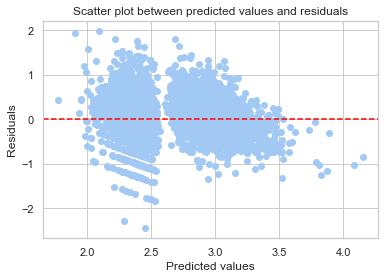

In [530]:
import matplotlib.pyplot as plt

predicted_values = model_5.predict(X)
residuals = df_copy_5['log_sum_article_week'] - predicted_values

plt.scatter(predicted_values, residuals)
plt.title("Scatter plot between predicted values and residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [531]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 0.25297730522061573


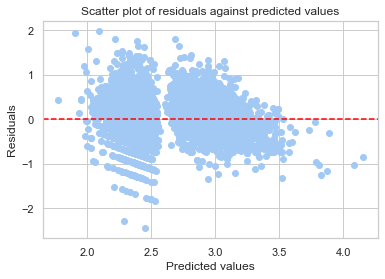

In [534]:
plt.scatter(predicted_values, residuals)
plt.title("Scatter plot of residuals against predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


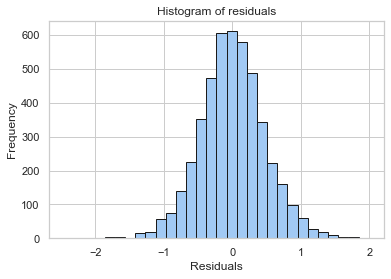

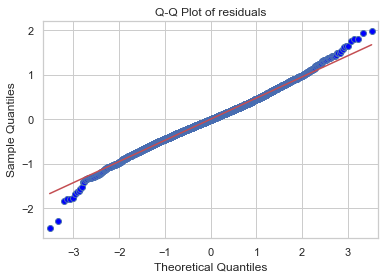

In [532]:
from statsmodels.graphics.gofplots import qqplot

# Histogram
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
qqplot(residuals, line='s')
plt.title("Q-Q Plot of residuals")
plt.show()


In [533]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the constant column for VIF calculation
X_excl_const = X.drop('const', axis=1)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_excl_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_excl_const.values, i) for i in range(X_excl_const.shape[1])]

print(vif_data)


                                       Variable       VIF
0                  absolute_mean_temp_deviation  3.137706
1            absolute_mean_wind_speed_deviation  3.013592
2                 absolute_acc_precip_deviation  2.571885
3        absolute_mean_temp_deviation_post_2019  3.121965
4  absolute_mean_wind_speed_deviation_post_2019  2.993004
5       absolute_acc_precip_deviation_post_2019  2.645989
